# Pruebas 

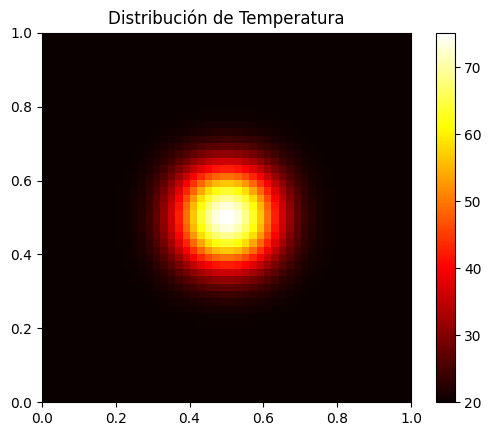

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation_2d(Lx, Ly, Px, Py, alpha, dt, N, initial_condition):
    """
    Resuelve la ecuación de calor en 2D usando el método de diferencias finitas explícito.

    Parámetros:
    Lx, Ly: Tamaño del dominio en las direcciones x e y.
    Px, Py: Número de puntos en cada dirección.
    alpha: Difusividad térmica.
    dt: Paso de tiempo.
    N: Número de pasos de tiempo.
    initial_condition: Función que define la condición inicial en el dominio.

    Retorna:
    u: Matriz de temperatura después de nt pasos de tiempo.
    """
    dx = Lx / (Nx - 1)
    dy = Ly / (Ny - 1)

    # Inicialización del dominio de temperatura
    u = np.zeros((Px, Py))

    # Aplicar la condición inicial
    for i in range(Px):
        for j in range(Py):
            u[i, j] = initial_condition(i * dx, j * dy)

    # Bucle en el tiempo
    for n in range(N):
        u_new = u.copy()
        for i in range(1, Px-1):
            for j in range(1, Py-1):
                u_new[i, j] = (u[i, j] +
                               alpha * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) +
                               alpha * dt / dy**2 * (u[i, j+1] - 2*u[i, j] + u[i, j-1]))
        u = u_new.copy()

    return u

def plot_heat_distribution(u, Lx, Ly):
    """
    Dibuja la distribución de temperatura.

    Parámetros:
    u: Matriz de temperatura.
    Lx, Ly: Tamaño del dominio en las direcciones x e y.
    """
    plt.imshow(u, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot')
    plt.colorbar()
    plt.title('Distribución de Temperatura')
    plt.show()

# Definición de la condición inicial
def initial_condition(x, y):
    if 0.4 <= x <= 0.6 and 0.4 <= y <= 0.6:
        return 100
    else:
        return 20


# Parámetros
Lx, Ly = 1.0, 1.0
Nx, Ny = 50, 50
alpha = 22.8e-6
dt = 1
N = 120

# Resolver la ecuación de calor
u = solve_heat_equation_2d(Lx, Ly, Nx, Ny, alpha, dt, N, initial_condition)

# Visualizar la distribución de temperatura
plot_heat_distribution(u, Lx, Ly)
